In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worlds-best-restaurants/WorldsBestRestaurants.csv


In [53]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium

In [54]:
file_path = "/kaggle/input/worlds-best-restaurants/WorldsBestRestaurants.csv"

In [55]:
data = pd.read_csv(file_path)

In [56]:
data.head()

,year,rank,restaurant,location,country,lat,lng
0,2002,1,El Bulli,Roses,Spain,42.263949,3.179553
1,2002,2,Restaurant Gordon Ramsay,London,United Kingdom,51.507218,-0.127586
2,2002,3,The French Laundry,Yountville,United States,38.401578,-122.360810
3,2002,4,Rockpool,Sydney,Australia,-33.868820,151.209295
4,2002,5,Spoon des Iles,Ile Maurice,Mauritius,-20.348404,57.552152


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1050 non-null   int64  
 1   rank        1050 non-null   int64  
 2   restaurant  1050 non-null   object 
 3   location    1050 non-null   object 
 4   country     1050 non-null   object 
 5   lat         1050 non-null   float64
 6   lng         1050 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.5+ KB


In [58]:
data.isnull().sum()

year          0
rank          0
restaurant    0
location      0
country       0
lat           0
lng           0
dtype: int64

In [59]:
leaders = data[data['rank'] == 1]

In [60]:
print(leaders.dtypes)

year            int64
rank            int64
restaurant     object
location       object
country        object
lat           float64
lng           float64
dtype: object


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:

# Convert 'restaurant' to numeric using LabelEncoder
label_encoder = LabelEncoder()
leaders['restaurant'] = label_encoder.fit_transform(leaders['restaurant'])

/tmp/ipykernel_30/3198727866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaders['restaurant'] = label_encoder.fit_transform(leaders['restaurant'])


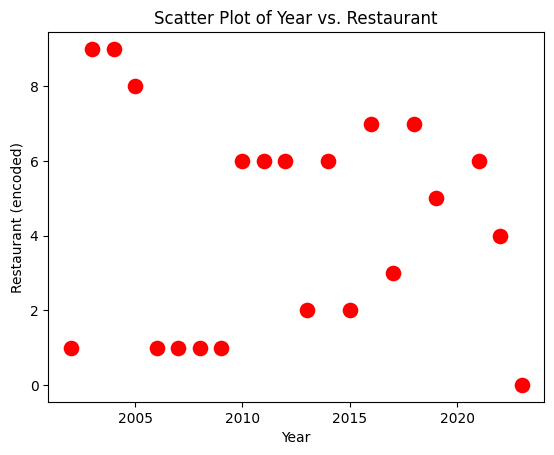

In [63]:
sns.scatterplot(x='year', y='restaurant', data=leaders, s=150, color="red")
plt.xlabel('Year')
plt.ylabel('Restaurant (encoded)')
plt.title('Scatter Plot of Year vs. Restaurant')
plt.show()

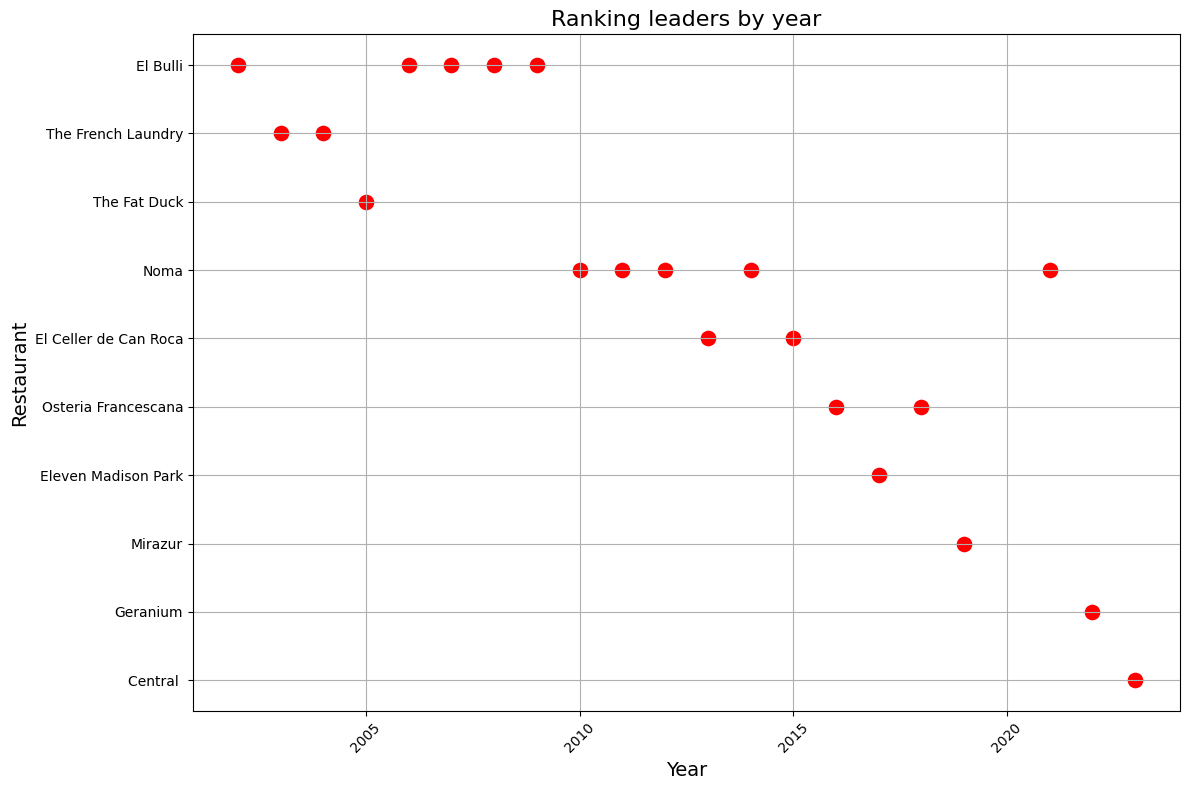

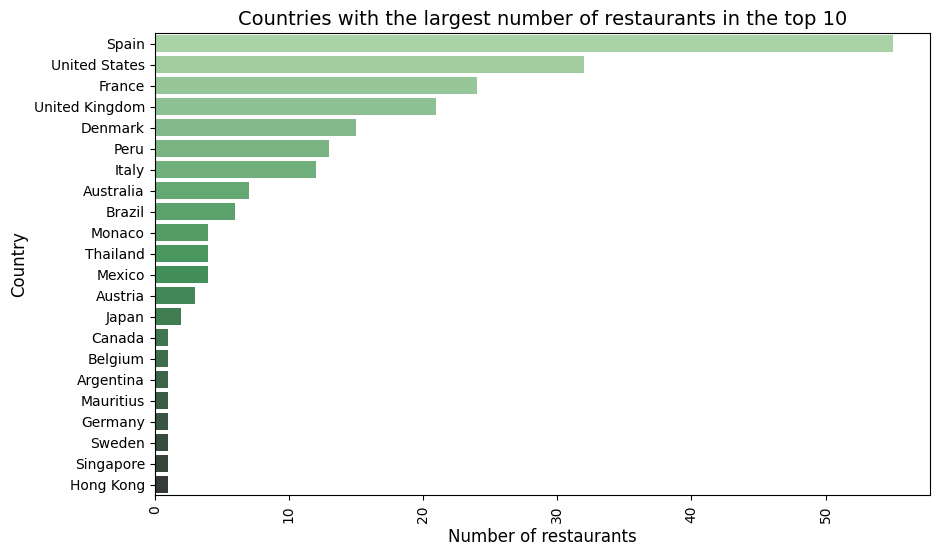

In [64]:
leaders = data[data['rank'] == 1]

plt.figure(figsize=(12, 8))

sns.scatterplot(x='year', y='restaurant', data=leaders, s=150, color="red")

plt.title('Ranking leaders by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

top_10 = data[data['rank'] <= 10]

top_10_countries = top_10['country'].value_counts().reset_index()
top_10_countries.columns = ['country', 'count']


plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='country', data=top_10_countries, palette='Greens_d')
plt.title('Countries with the largest number of restaurants in the top 10', fontsize=14)
plt.xlabel('Number of restaurants', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [65]:
map_world = folium.Map(location=[20,0], zoom_start=2)

for index, row in data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"{row['restaurant']} ({row['country']})"
        ).add_to(map_world)

map_world.save("restaurants_map.html")

map_world

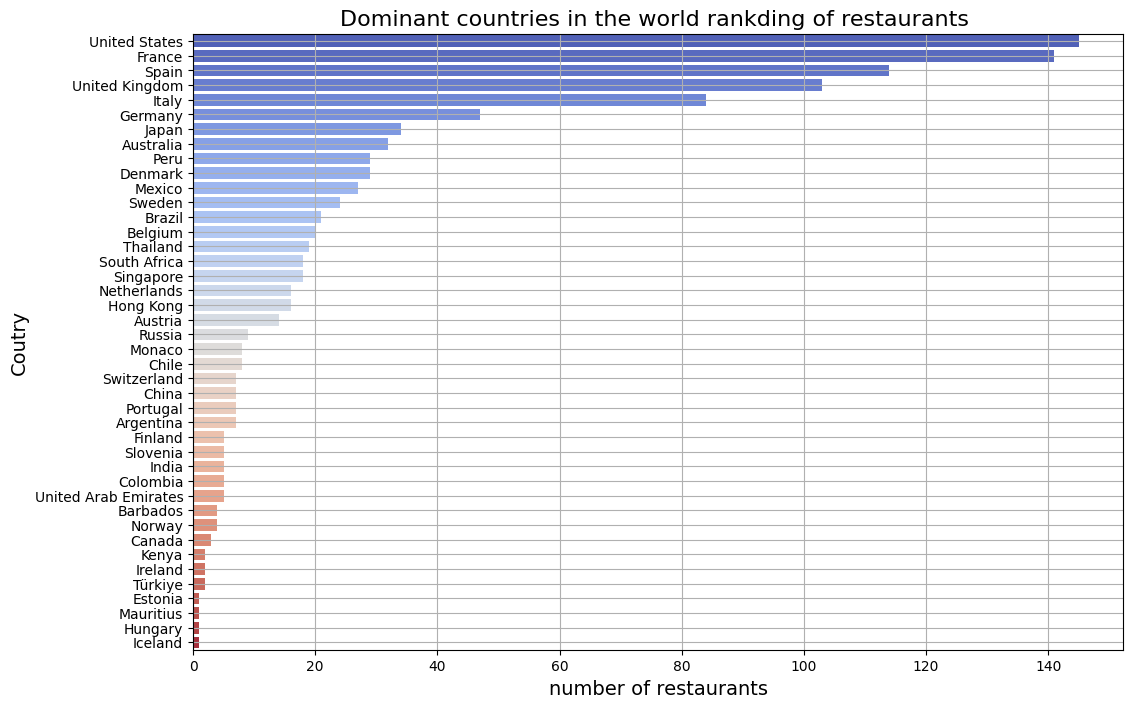

In [67]:
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

plt.figure(figsize=(12,8))
sns.barplot(x='count', y='country', data=country_counts, palette='coolwarm')
plt.title('Dominant countries in the world rankding of restaurants ', fontsize=16)
plt.xlabel("number of restaurants", fontsize=14)
plt.ylabel('Coutry', fontsize=14)
plt.grid(True)
plt.show()

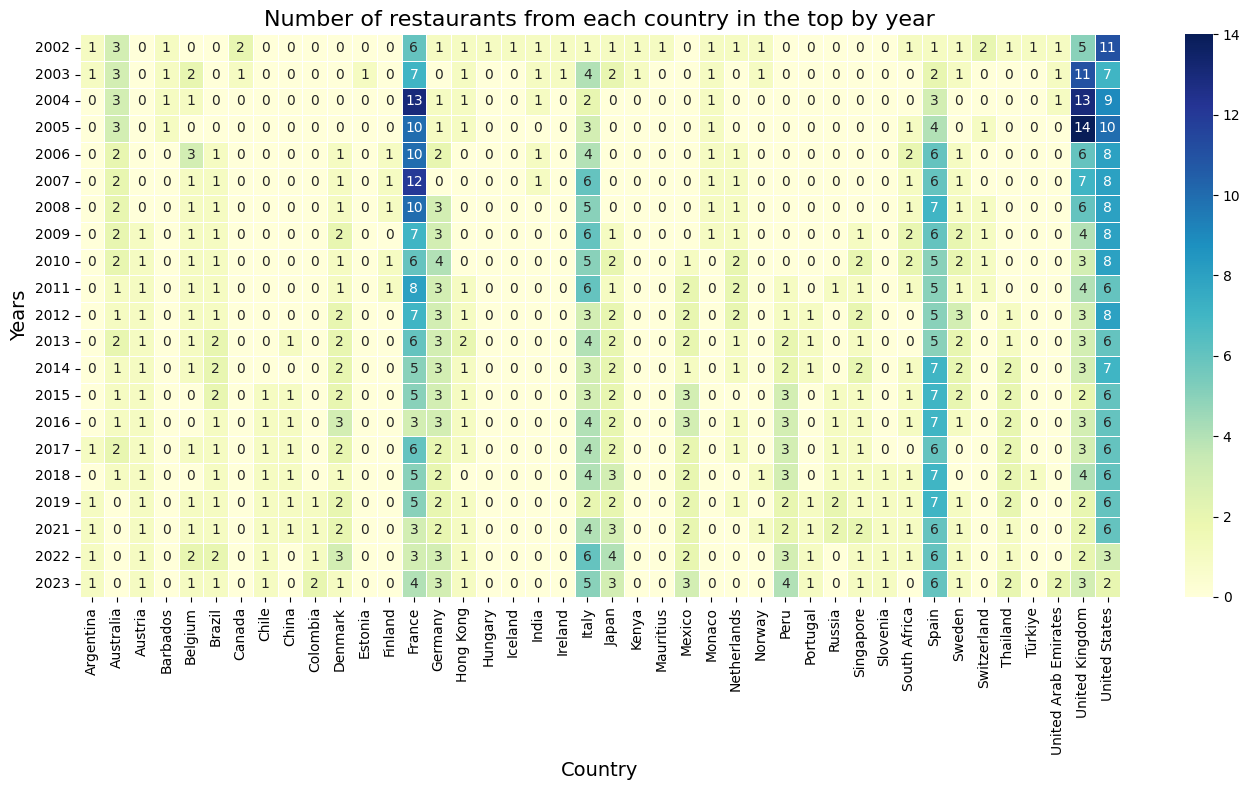

In [68]:
country_year_counts = data.groupby(['year', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(country_year_counts, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)
plt.title('Number of restaurants from each country in the top by year', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Years', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

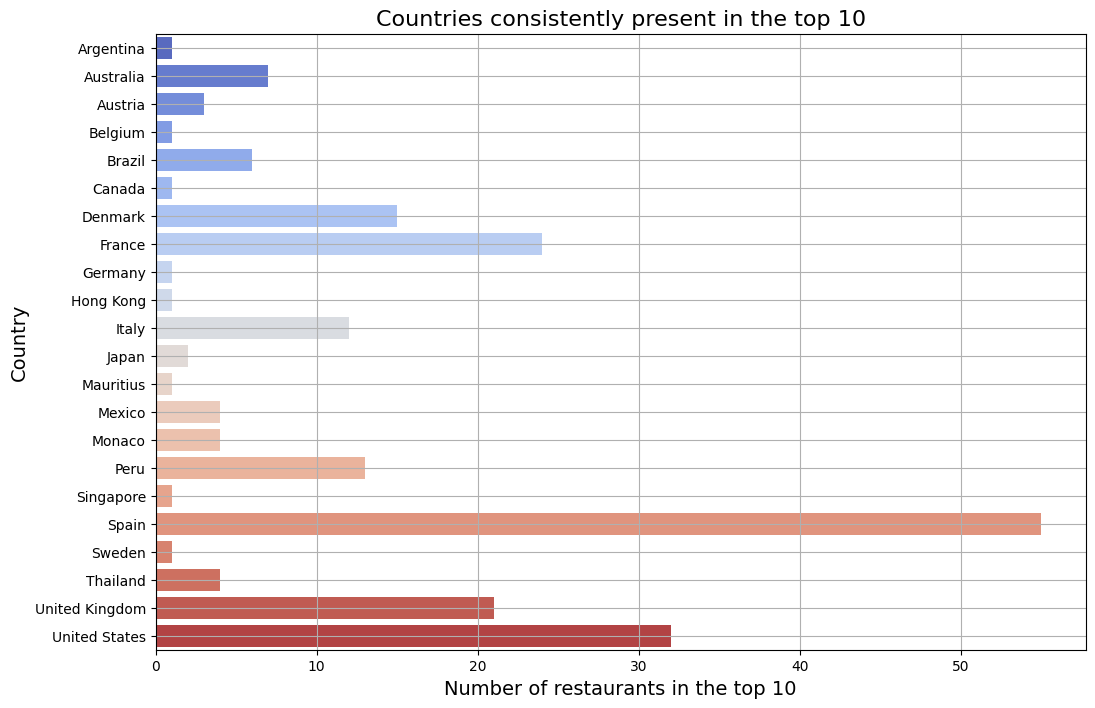

In [69]:
top_10 = data[data['rank'] <= 10]

top_10_country_counts = top_10.groupby('country').size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='country', data=top_10_country_counts, palette='coolwarm')
plt.title('Countries consistently present in the top 10', fontsize=16)
plt.xlabel('Number of restaurants in the top 10', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True)
plt.show()

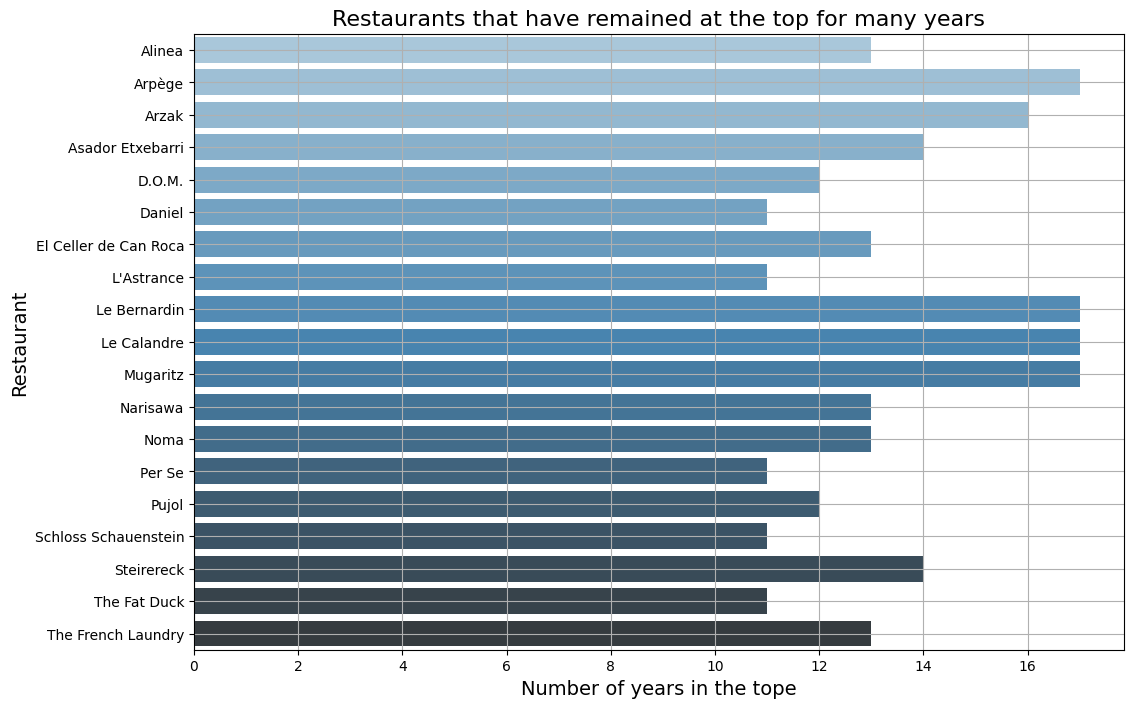

In [70]:
restaurant_years = data.groupby('restaurant')['year'].nunique().reset_index()
restaurant_years.columns = ['restaurant', 'years_in_top']

long_lasting_restaurants = restaurant_years[restaurant_years['years_in_top'] > 10]

plt.figure(figsize=(12, 8))
sns.barplot(x='years_in_top', y='restaurant', data=long_lasting_restaurants, palette='Blues_d')
plt.title('Restaurants that have remained at the top for many years', fontsize=16)
plt.xlabel('Number of years in the topе', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.grid(True)
plt.show()

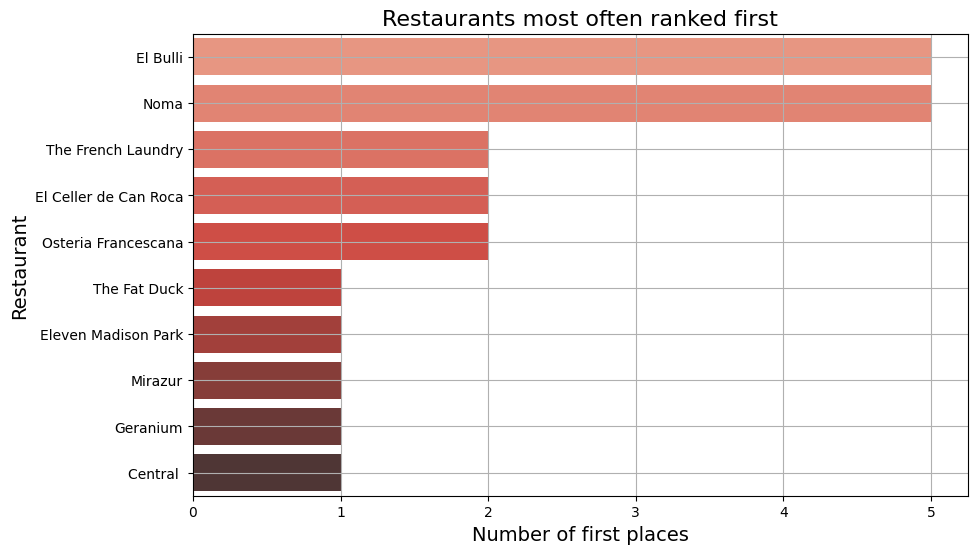

In [71]:
first_place_restaurants = data[data['rank'] == 1]

first_place_counts = first_place_restaurants['restaurant'].value_counts().reset_index()
first_place_counts.columns = ['restaurant', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='restaurant', data=first_place_counts, palette='Reds_d')
plt.title('Restaurants most often ranked first', fontsize=16)
plt.xlabel('Number of first places', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.grid(True)
plt.show()

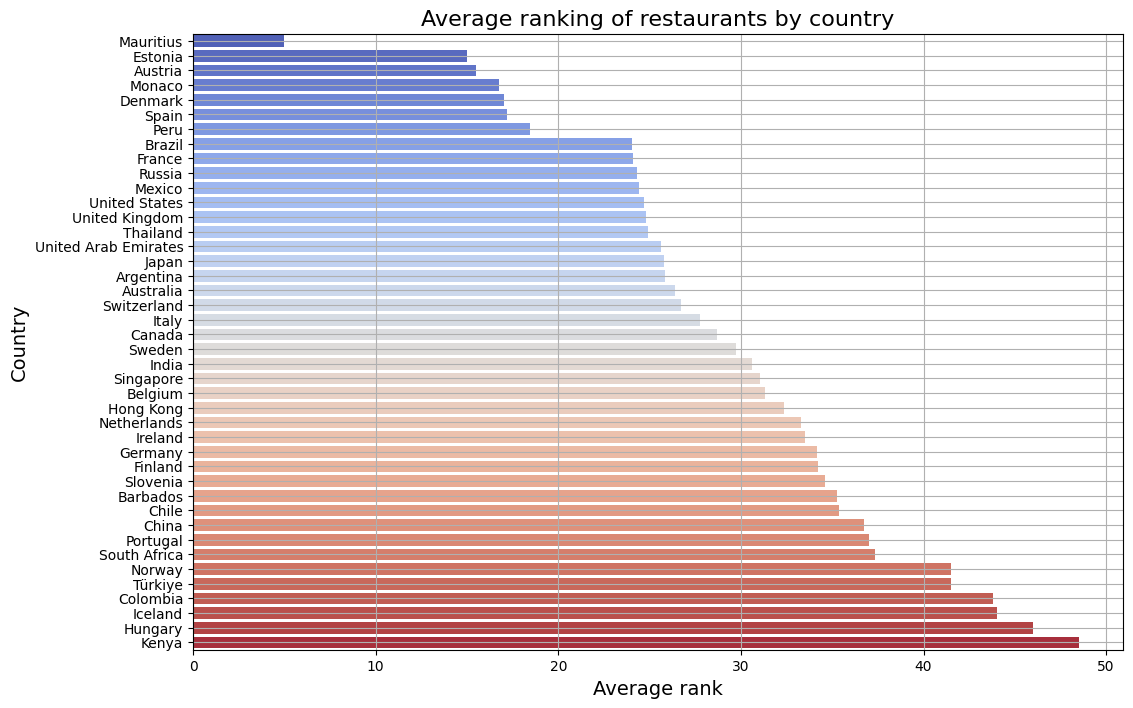

In [72]:
average_rank_by_country = data.groupby('country')['rank'].mean().reset_index()
average_rank_by_country = average_rank_by_country.sort_values(by='rank')

plt.figure(figsize=(12, 8))
sns.barplot(x='rank', y='country', data=average_rank_by_country, palette='coolwarm')
plt.title('Average ranking of restaurants by country', fontsize=16)
plt.xlabel('Average rank', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True)
plt.show()